This is our data and how networkx parses through our data. I am exploring the data so I can understanding networkx and then move on to data analysis.

In [109]:
import networkx as nx
import helper

train_data = helper.load_data_from_file("../data/graph_data.json") # dictionary of SMILES and values are graphs

graph = train_data["B1(C2=C(C=CS2)C=NN1C)C"] # example of networkx graph

In [42]:
# Graph is a netowrkx class
graph

In [43]:
# Training data is currently a dictionary of SMILES strings and corresponding graphs
for i in range(23, 25):
    r = list(train_data.keys())[i]
    print(r, ":" , train_data[r])
    

B1(C2=C(C=CS2)C=NN1C)C : Graph with 11 nodes and 12 edges
[B-](C)(C)(C)C#[N+]C(C)(C)C : Graph with 10 nodes and 9 edges


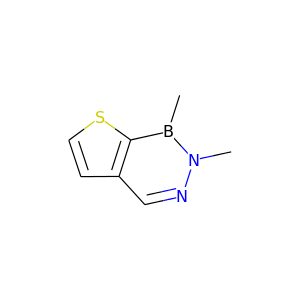

In [44]:
from IPython.display import Image, display

# Smiles to image converter: http://hulab.rxnfinder.org/smi2img/

# B1(C2=C(C=CS2)C=NN1C)C
display(Image(filename='tempimg.png'))

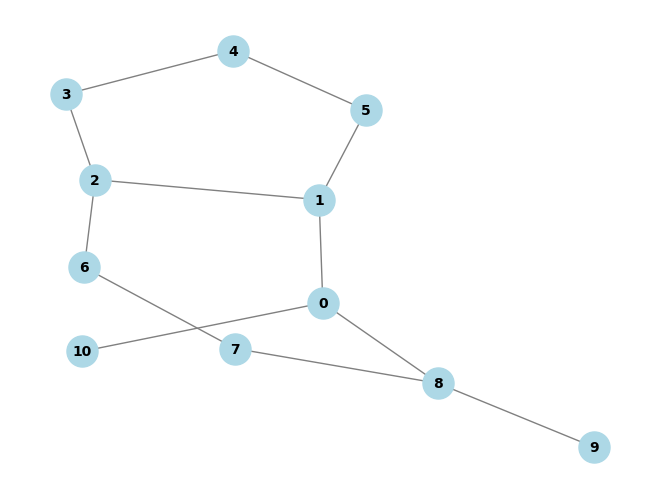

In [ ]:
# draw the graph
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black', font_weight='bold', edge_color='gray')

In [45]:
# graph nodes
graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

In [46]:
graph.nodes(data=True)[0] # get data for node 0 (Boron)

{'atom_type': 'B',
 'formal_charge': 0,
 'orbitals': ['1s'],
 'binding_energies': [194.9]}

In [47]:
graph.edges

EdgeView([(0, 1), (0, 10), (0, 8), (1, 2), (1, 5), (2, 3), (2, 6), (3, 4), (4, 5), (6, 7), (7, 8), (8, 9)])

In [48]:
# bond types are 'SINGLE', 'DOUBLE', 'TRIPLE'
list(graph.edges(data=True))[3]  # Get data for the first edge

(1, 2, {'bond_type': 'DOUBLE'})

In [ ]:
# add edge to node 2
graph.add_edge(2, 4, bond_type='SINGLE')

In [50]:
graph.edges

EdgeView([(0, 1), (0, 10), (0, 8), (1, 2), (1, 5), (2, 3), (2, 6), (2, 4), (3, 4), (4, 5), (6, 7), (7, 8), (8, 9)])

In [51]:
# remove edge from node 2
graph.remove_edge(2, 4)
graph.edges

EdgeView([(0, 1), (0, 10), (0, 8), (1, 2), (1, 5), (2, 3), (2, 6), (3, 4), (4, 5), (6, 7), (7, 8), (8, 9)])

In [ ]:
graph[2] # get all edges for node 2

AtlasView({1: {'bond_type': 'DOUBLE'}, 3: {'bond_type': 'SINGLE'}, 6: {'bond_type': 'SINGLE'}})

In [ ]:
graph[2][3] # get data for edge 2,3

{'bond_type': 'SINGLE'}

In [72]:
graph.nodes[0].get('atom_type') # get atom type for node 0 (Boron)

'B'

In [77]:
# subgraph view of only carbon atoms
subg = nx.graphviews.subgraph_view(graph, filter_node=lambda d: graph.nodes[d].get('atom_type') == 'C')

In [ ]:
subg.nodes(data=True) # get data for all nodes in the carbon subgraph

NodeDataView({1: {'atom_type': 'C', 'formal_charge': 0, 'orbitals': [-1], 'binding_energies': [-1]}, 2: {'atom_type': 'C', 'formal_charge': 0, 'orbitals': [-1], 'binding_energies': [-1]}, 3: {'atom_type': 'C', 'formal_charge': 0, 'orbitals': [-1], 'binding_energies': [-1]}, 4: {'atom_type': 'C', 'formal_charge': 0, 'orbitals': [-1], 'binding_energies': [-1]}, 6: {'atom_type': 'C', 'formal_charge': 0, 'orbitals': [-1], 'binding_energies': [-1]}, 9: {'atom_type': 'C', 'formal_charge': 0, 'orbitals': [-1], 'binding_energies': [-1]}, 10: {'atom_type': 'C', 'formal_charge': 0, 'orbitals': [-1], 'binding_energies': [-1]}})

In [83]:
nx.get_node_attributes(subg, 'atom_type') # get all node attributes for the carbon subgraph

{1: 'C', 2: 'C', 3: 'C', 4: 'C', 6: 'C', 9: 'C', 10: 'C'}

In [84]:
nx.get_edge_attributes(subg, 'bond_type') # get all edge attributes for the carbon subgraph

{(1, 2): 'DOUBLE', (2, 3): 'SINGLE', (2, 6): 'SINGLE', (3, 4): 'DOUBLE'}

In [ ]:
# get all nodes with orbitals not -1
subg = nx.graphviews.subgraph_view(graph, filter_node=lambda d: graph.nodes[d].get('orbital') != -1)

In [96]:
# nodes with valid orbitals
node_indices = [n for n, v in graph.nodes(data=True) if v['orbitals'][0] != -1]

In [100]:
ni = node_indices[0]

In [ ]:
# add a bond 'NONE' to all non-neighbors of target node, like node 0
for n_i in node_indices:
    for nb_i in nx.non_neighbors(graph, n_i): # get all neighbors for node 0
        graph.add_edge(n_i, nb_i, bond_type='NONE') # add edge to node 0

In [112]:
graph.edges(data=True) # get all edges for the graph

EdgeDataView([(0, 1, {'bond_type': 'SINGLE'}), (0, 10, {'bond_type': 'SINGLE'}), (0, 8, {'bond_type': 'SINGLE'}), (0, 2, {'bond_type': 'NONE'}), (0, 3, {'bond_type': 'NONE'}), (0, 4, {'bond_type': 'NONE'}), (0, 5, {'bond_type': 'NONE'}), (0, 6, {'bond_type': 'NONE'}), (0, 7, {'bond_type': 'NONE'}), (0, 9, {'bond_type': 'NONE'}), (1, 2, {'bond_type': 'DOUBLE'}), (1, 5, {'bond_type': 'SINGLE'}), (2, 3, {'bond_type': 'SINGLE'}), (2, 6, {'bond_type': 'SINGLE'}), (3, 4, {'bond_type': 'DOUBLE'}), (4, 5, {'bond_type': 'SINGLE'}), (6, 7, {'bond_type': 'DOUBLE'}), (7, 8, {'bond_type': 'SINGLE'}), (8, 9, {'bond_type': 'SINGLE'})])

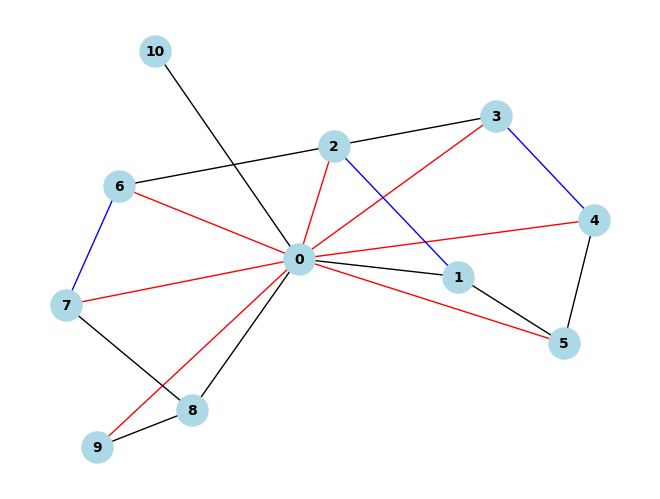

In [115]:
# Define a color map for bond types
bond_type_colors = {'SINGLE': 'black', 'DOUBLE': 'blue', 'TRIPLE': 'green', 'NONE': 'red'}

# Get the colors for each edge based on bond_type
edge_colors = [bond_type_colors.get(data['bond_type'], 'black') for _, _, data in graph.edges(data=True)]

# Draw the graph with edge colors
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black', font_weight='bold', edge_color=edge_colors)

In [5]:
print(" ")
print(f"We have {len(train_data.keys())} molecular graphs to train with.")
print("Please adhere to best practices during training.\n")

print("The networkx graphs in the graph_data.json file are lablled by SMILES strings")
print("For more details on SMILES, visit: https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system\n")
print("Below is an example of the graph nodes called by the SMILE string C[CH2-].C[CH2-].[Zn+2].\n")

print("Graph Nodes:")
for node, data in graph.nodes(data=True):
     print(f"Node {node}: {data}")

print("\nGraph Edges:")
for u, v, data in graph.edges(data=True):  
     print(f"Edge ({u}, {v}): {data}")
print(" ")

print("Let's examine the organization of the nodes by printing node 0:")
print("Remember, the index has no inherent meaning;")
print("your results should be consistent even if these indices are permuted.")
print("Permutation Invariance!\n")

print("'atom_type', 'formal_charge' and 'orbitals' are the attributes available for node featurization, 'binding_energies' are the node labels to predict:\n")
print("\t'atom_type' represents the atomic number, or the number of protons in an atom's nucleus.")
print("\t\tThis number differentiates elements, e.g., 6 for carbon and 1 for hydrogen.")
print("\t\tThis dataset contains 55 different atom types, use a one-hot encoding vector of length 55,")
print("\t\t... or try different atom representations available in the literature (SkipAtom, Mat2Vec ...)\n")

print("\t'formal_charge' is the integer charge of the atom in the molecule.\n")

print("\t'orbitals' is a vector of the orbitals types with binding energy values.")
print("\t\tThe length of this vector is same length as the binding energies vector.\n")

print("\t'binding_energies' is a vector of the output node labels to predict.\n")

print("The binding energy data is sparse, many of the orbitals and binding energies above are assigned -1 dummy values.\n")

print("Furthermore, some graph nodes will have many binding energy values.")
print("There are even some single atom graphs in the data.")
print("For example the Xe atom (SMILE string [Xe]) has many binding energies:\n")

atom_graph = train_data["[Xe]"]
print("Graph for [Xe]:")
print(atom_graph.nodes(data=True))
print(" ")

print("We suggest two ideas for handling the multidimensional nature of the outputs in the project presentation slides.\n") 

print("For the edges, the 'bond_type' feature is categorical and given as a string.\n") 
print("\tPossible types are SINGLE, DOUBLE, TRIPLE. use a one-hot encoding for the bond-types.")
print("\tIn the example above, Node 4 is not bonded to any other atoms.") 
print("\tTherefore you should turn this data into fully connected graphs and create another 'bond_type' catergory called NONE.\n")

print("One possible way to improve the predictions is to include more features to the graphs")
print("This can be done through modifying database_2_graph.py, see the comment in line 323 of this code")
print("This would will reduce the size of the traning data as the modification will induce rdkit errors,")
print("for some molecules.\n")

print("The following google colab tutorial is good starting point for molecular graph neural networks in PyTorch:\n")

print("https://colab.research.google.com/github/chaitjo/geometric-gnn-dojo/blob/main/geometric_gnn_101.ipynb")

print("\nThe conda envrionment for this project will enable you to run the code from this tutorial on the gpu's provided\n")

print("Only the intro and Part 0 of the tutorial is appliciable for this project, as the present data does not contain") 
print("molecular geometry information.\n")

 
We have 861 molecular graphs to train with.
Please adhere to best practices during training.

The networkx graphs in the graph_data.json file are lablled by SMILES strings
For more details on SMILES, visit: https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system

Below is an example of the graph nodes called by the SMILE string C[CH2-].C[CH2-].[Zn+2].

Graph Nodes:
Node 0: {'atom_type': 'C', 'formal_charge': 0, 'orbitals': [-1], 'binding_energies': [-1]}
Node 1: {'atom_type': 'C', 'formal_charge': -1, 'orbitals': [-1], 'binding_energies': [-1]}
Node 2: {'atom_type': 'C', 'formal_charge': 0, 'orbitals': [-1], 'binding_energies': [-1]}
Node 3: {'atom_type': 'C', 'formal_charge': -1, 'orbitals': [-1], 'binding_energies': [-1]}
Node 4: {'atom_type': 'Zn', 'formal_charge': 2, 'orbitals': ['3d5/2'], 'binding_energies': [16.709]}

Graph Edges:
Edge (0, 1): {'bond_type': 'SINGLE'}
Edge (2, 3): {'bond_type': 'SINGLE'}
 
Let's examine the organization of the nodes by printin